In [1]:
### h1n1_vaccine_prediction

## Problem Statement: Prediction of vaccination!
Type: Binary Classification Vaccinated prediction is classic problem to learn and apply lots of data analysis techniques to create best Classification model.

Given with the dataset consisting of details of patients for vaccine and status whether the vaccination is done or not. Basis on the a binary classification model is to be created with maximum accuracy.

In [2]:
### Step 1: Import the packages numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [3]:
#Basic and neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split

#Warnings Handling
import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
### Step 2:Load the Dataset

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
data.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
### Step 3:Explore the data-shape,data visualisation

In [7]:
data.shape

(26707, 34)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [10]:
duplicate=data.duplicated()
print(duplicate.sum())

0


In [11]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

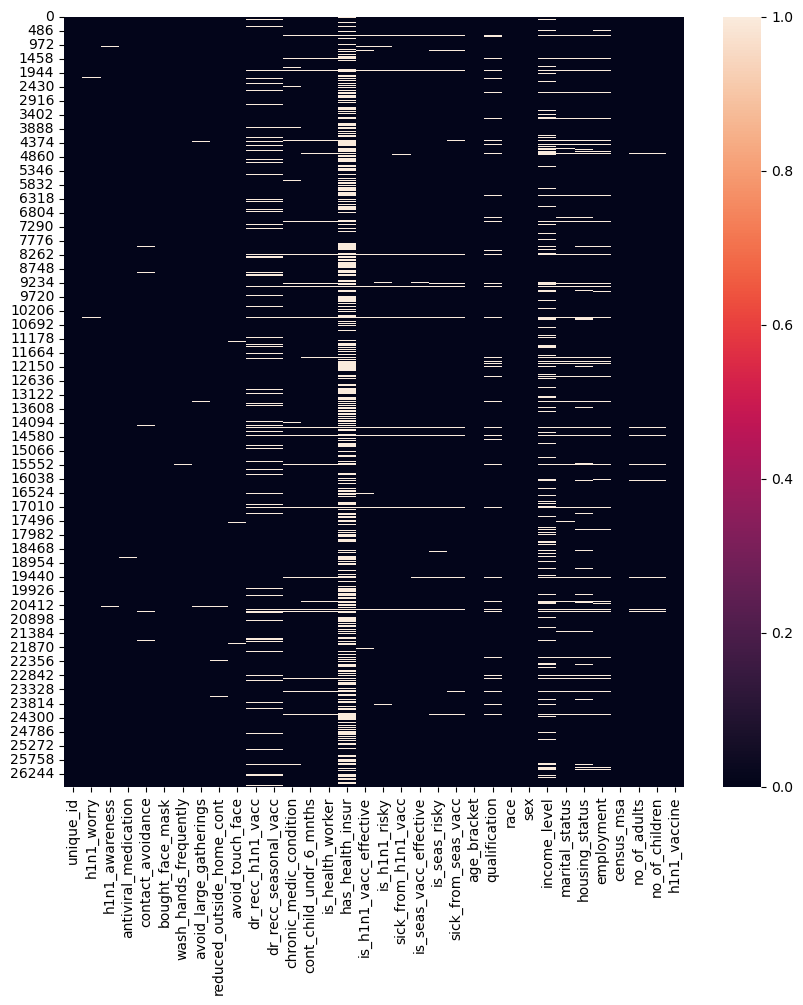

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())
plt.show()

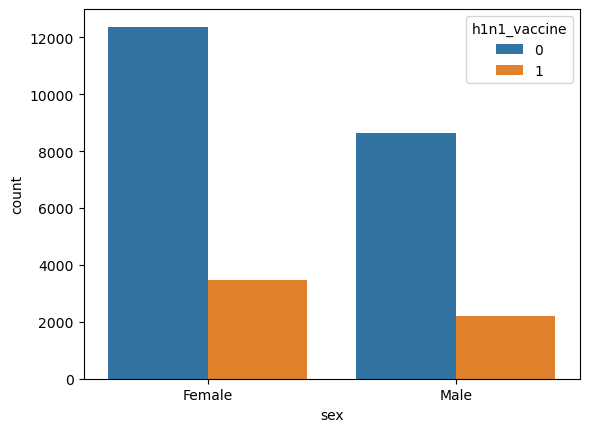

In [13]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=data)
plt.show()

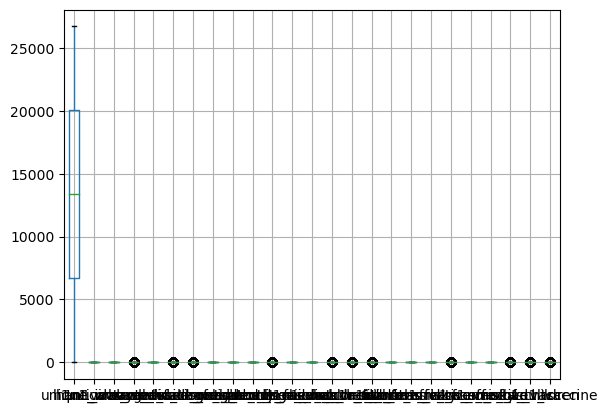

In [14]:
data.boxplot()
plt.show()

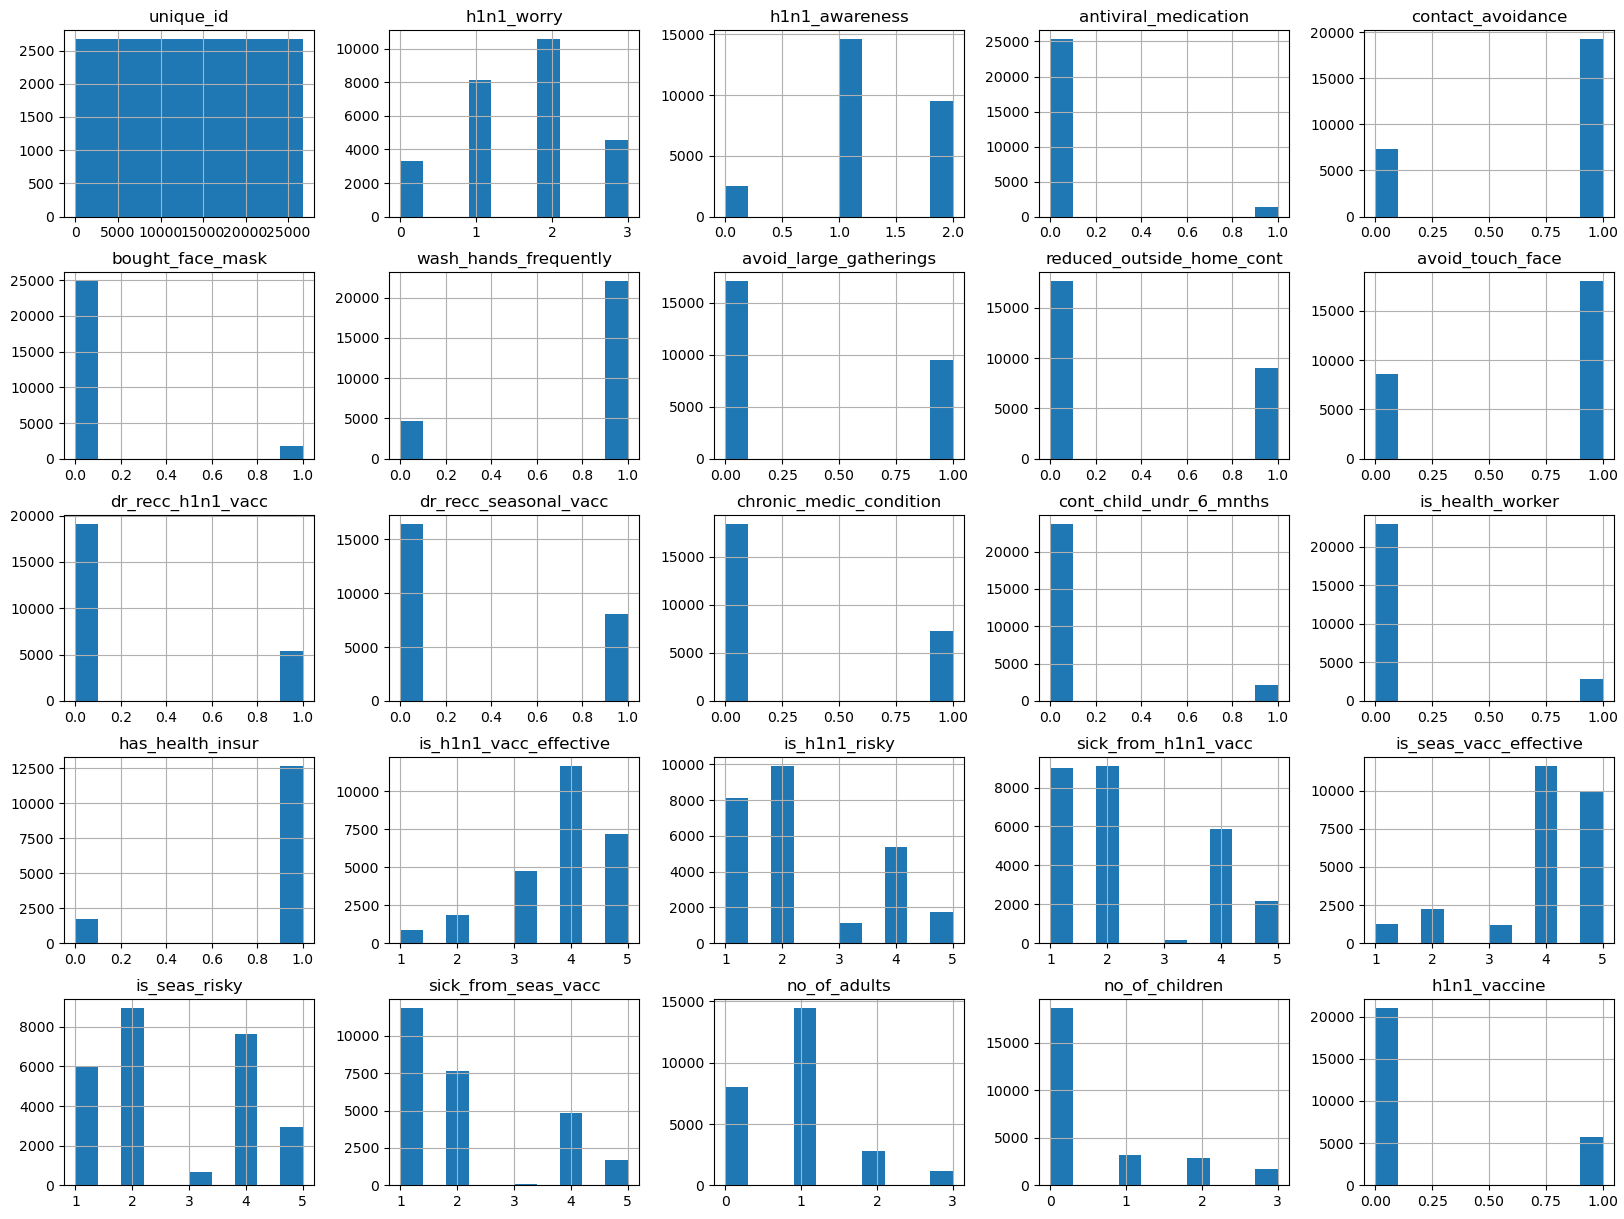

In [15]:
data.hist(figsize=(20,15))
plt.show()

In [16]:
##data cleaning
## here 0:not vaccinated & 1:vaccinated

data["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [17]:
data.groupby("h1n1_vaccine").mean()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
h1n1_vaccine,,,,,,,,,,,,,,,,,,,,,,,,
0,13366.133885,1.560815,1.224653,0.044305,0.714546,0.059705,0.810887,0.354198,0.331966,0.659848,0.132700,0.276787,0.260917,0.072986,0.084033,0.854087,3.709576,2.126815,2.304503,3.924745,2.533000,2.112314,0.883542,0.536186
1,13304.313888,1.832096,1.402866,0.065722,0.766531,0.103387,0.880184,0.375088,0.357118,0.741690,0.524504,0.513573,0.365623,0.117966,0.214647,0.940326,4.372633,3.142985,2.554622,4.400752,3.408112,2.139527,0.897427,0.528660


In [18]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [19]:
null_var=(data.isnull().sum()*1000)/data.shape[0]
null_var

unique_id                      0.000000
h1n1_worry                     3.444790
h1n1_awareness                 4.343431
antiviral_medication           2.658479
contact_avoidance              7.788220
bought_face_mask               0.711424
wash_hands_frequently          1.572621
avoid_large_gatherings         3.257573
reduced_outside_home_cont      3.070356
avoid_touch_face               4.792751
dr_recc_h1n1_vacc             80.877673
dr_recc_seasonal_vacc         80.877673
chronic_medic_condition       36.357509
cont_child_undr_6_mnths       30.703561
is_health_worker              30.104467
has_health_insur             459.579885
is_h1n1_vacc_effective        14.640356
is_h1n1_risky                 14.528026
sick_from_h1n1_vacc           14.790130
is_seas_vacc_effective        17.298836
is_seas_risky                 19.245891
sick_from_seas_vacc           20.107088
age_bracket                    0.000000
qualification                 52.682817
race                           0.000000


In [20]:
drop_columns=null_var[null_var>50].keys()
drop_columns

Index(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'has_health_insur',
       'qualification', 'income_level', 'marital_status', 'housing_status',
       'employment'],
      dtype='object')

In [21]:
data.drop(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'has_health_insur',
       'qualification', 'income_level', 'marital_status', 'housing_status',
       'employment'],axis=1,inplace=True)

In [22]:
data.drop('unique_id',axis=1,inplace=True)

In [23]:
data.shape

(26707, 25)

In [24]:
age_val={"65+ Years":1, "18 - 34 Years":2,"55 - 64 Years":3,"35 - 44 Years":4, "45 - 54 Years":5}
data["age_bracket"]=data["age_bracket"].replace(age_val)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,White,Female,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,4,White,Male,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2,White,Male,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,1,White,Female,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,5,White,Female,"MSA, Not Principle City",1.0,0.0,0


In [25]:
data=pd.get_dummies(data,columns=["age_bracket"])
data.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5
21563,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,1.0,White,Female,Non-MSA,1.0,3.0,1,0,0,0,1,0
14448,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,White,Female,Non-MSA,0.0,0.0,0,1,0,0,0,0
16542,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0,White,Female,Non-MSA,0.0,0.0,0,0,0,0,0,1
3766,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,White,Male,Non-MSA,1.0,2.0,0,0,0,0,0,1
3832,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,4.0,2.0,4.0,Hispanic,Female,"MSA, Not Principle City",0.0,0.0,0,0,1,0,0,0
4270,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,White,Male,"MSA, Not Principle City",1.0,0.0,0,1,0,0,0,0
24509,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,5.0,5.0,2.0,White,Male,"MSA, Not Principle City",1.0,0.0,0,0,1,0,0,0
4112,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,2.0,Black,Female,"MSA, Not Principle City",0.0,0.0,0,0,1,0,0,0
16052,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,1.0,White,Male,"MSA, Not Principle City",1.0,0.0,1,1,0,0,0,0
19148,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,3.0,2.0,2.0,5.0,1.0,1.0,Black,Female,"MSA, Principle City",1.0,0.0,0,0,1,0,0,0


In [26]:
race_val={"White":1,"Black":2, "Hispanic":3,"Other or Multiple":4}
data["race"]=data["race"].replace(race_val)
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5
11600,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,5.0,1.0,1.0,1,Female,"MSA, Principle City",0.0,0.0,0,1,0,0,0,0
18606,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,1.0,4.0,1,Female,"MSA, Not Principle City",0.0,0.0,0,1,0,0,0,0
22607,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,"MSA, Principle City",NaN,NaN,0,0,0,0,1,0
6328,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,4.0,1.0,2.0,2.0,2.0,2.0,1,Female,"MSA, Not Principle City",1.0,0.0,0,0,0,1,0,0
20670,1.0,2.0,0.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,2.0,1,Male,"MSA, Not Principle City",3.0,1.0,0,0,1,0,0,0


In [27]:
data=pd.get_dummies(data,columns=["race"])
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5,race_1,race_2,race_3,race_4
16829,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,5.0,2.0,1.0,Female,"MSA, Not Principle City",1.0,3.0,0,0,0,0,1,0,1,0,0,0
10450,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0,Female,"MSA, Principle City",0.0,0.0,0,1,0,0,0,0,1,0,0,0
16315,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,2.0,4.0,Male,Non-MSA,1.0,0.0,0,1,0,0,0,0,1,0,0,0
13327,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,4.0,2.0,Female,"MSA, Not Principle City",0.0,0.0,0,0,0,0,0,1,1,0,0,0
4024,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,5.0,1.0,2.0,Male,"MSA, Principle City",1.0,0.0,0,1,0,0,0,0,1,0,0,0


In [28]:
sex_val={"Male":1,"Female":2}
data["sex"]=data["sex"].replace(sex_val)
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5,race_1,race_2,race_3,race_4
8092,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,4.0,2.0,2,"MSA, Principle City",2.0,0.0,0,0,1,0,0,0,1,0,0,0
3163,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,4.0,4.0,1.0,1,"MSA, Not Principle City",0.0,3.0,1,0,0,0,0,1,1,0,0,0
12354,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,4.0,4.0,3.0,5.0,4.0,1,"MSA, Principle City",2.0,0.0,0,0,1,0,0,0,0,0,1,0
21046,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,4.0,4.0,2,"MSA, Principle City",1.0,0.0,0,1,0,0,0,0,0,0,1,0
26614,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,4.0,2.0,2.0,2,"MSA, Not Principle City",1.0,0.0,0,0,0,0,0,1,1,0,0,0


In [29]:
data=pd.get_dummies(data,columns=["sex"])
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5,race_1,race_2,race_3,race_4,sex_1,sex_2
249,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,2.0,4.0,"MSA, Not Principle City",2.0,0.0,0,0,0,0,0,1,1,0,0,0,1,0
22817,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,4.0,1.0,1.0,"MSA, Principle City",1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
9758,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,1.0,5.0,4.0,1.0,"MSA, Not Principle City",0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,1
22324,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,5.0,4.0,1.0,Non-MSA,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1
5911,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,2.0,5.0,2.0,4.0,"MSA, Not Principle City",1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0


In [30]:
census_msa_val={"Non-MSA":1,"MSA, Principle City":2,"MSA, Not Principle City":3}
data["census_msa"]=data["census_msa"].replace(census_msa_val)
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5,race_1,race_2,race_3,race_4,sex_1,sex_2
16762,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,1.0,5.0,4.0,1.0,"MSA, Not Principle City",0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1
16796,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,2.0,5.0,5.0,1.0,"MSA, Not Principle City",1.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1
6413,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,"MSA, Not Principle City",0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1
24574,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,5.0,2.0,2.0,2,3.0,0.0,0,0,0,0,1,0,0,0,0,1,1,0
11747,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,2.0,"MSA, Not Principle City",1.0,2.0,0,0,0,0,0,1,1,0,0,0,0,1


In [31]:
data=pd.get_dummies(data,columns=["census_msa"])
data.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_1,age_bracket_2,age_bracket_3,age_bracket_4,age_bracket_5,race_1,race_2,race_3,race_4,sex_1,sex_2,census_msa_1,census_msa_2,"census_msa_MSA, Not Principle City"
24051,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,1.0,4.0,2.0,1.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
17787,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
16409,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,4.0,5.0,4.0,2.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
18953,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,5.0,2.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4150,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,4.0,4.0,1.0,1.0,3.0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0


In [32]:
#Fillings nan values in the columns of the datase

#with mean
data["avoid_touch_face"] = data["avoid_touch_face"].fillna(data["avoid_touch_face"].mean())
data["reduced_outside_home_cont"] = data["reduced_outside_home_cont"].fillna(data["reduced_outside_home_cont"].mean())
data["avoid_large_gatherings"] = data["avoid_large_gatherings"].fillna(data["avoid_large_gatherings"].mean())
data["bought_face_mask"] = data["bought_face_mask"].fillna(data["bought_face_mask"].mean())

# with median
data["wash_hands_frequently"] = data["wash_hands_frequently"].fillna(data["wash_hands_frequently"].median())
data["h1n1_worry"] = data["h1n1_worry"].fillna(data["h1n1_worry"].median())
data["h1n1_awareness"] = data["h1n1_awareness"].fillna(data["h1n1_awareness"].median())
data["antiviral_medication"] = data["antiviral_medication"].fillna(data["antiviral_medication"].median())
data["is_h1n1_vacc_effective"] = data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].median())
data["contact_avoidance"] = data["contact_avoidance"].fillna(data["contact_avoidance"].median())
data["is_h1n1_vacc_effective"] = data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].median())
data["is_h1n1_risky"] = data["is_h1n1_risky"].fillna(data["is_h1n1_risky"].median())
data["sick_from_h1n1_vacc"] = data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].median())
data["is_seas_vacc_effective"] = data["is_seas_vacc_effective"].fillna(data["is_seas_vacc_effective"].median())
data["sick_from_h1n1_vacc"] = data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].median())
data["no_of_adults"] = data["no_of_adults"].fillna(data["no_of_adults"].median())
data["no_of_children"] = data["no_of_children"].fillna(data["no_of_children"].median())
data["is_seas_risky"] = data["is_seas_risky"].fillna(data["is_seas_risky"].median())
data["sick_from_seas_vacc"] = data["sick_from_seas_vacc"].fillna(data["sick_from_seas_vacc"].median())
data["chronic_medic_condition"] = data["chronic_medic_condition"].fillna(data["chronic_medic_condition"].median())
data["cont_child_undr_6_mnths"] = data["cont_child_undr_6_mnths"].fillna(data["cont_child_undr_6_mnths"].median())
data["is_health_worker"] = data["is_health_worker"].fillna(data["is_health_worker"].median())

In [33]:
#checking for the nunl values in the dataset
data.isnull().sum()

h1n1_worry                             0
h1n1_awareness                         0
antiviral_medication                   0
contact_avoidance                      0
bought_face_mask                       0
wash_hands_frequently                  0
avoid_large_gatherings                 0
reduced_outside_home_cont              0
avoid_touch_face                       0
chronic_medic_condition                0
cont_child_undr_6_mnths                0
is_health_worker                       0
is_h1n1_vacc_effective                 0
is_h1n1_risky                          0
sick_from_h1n1_vacc                    0
is_seas_vacc_effective                 0
is_seas_risky                          0
sick_from_seas_vacc                    0
no_of_adults                           0
no_of_children                         0
h1n1_vaccine                           0
age_bracket_1                          0
age_bracket_2                          0
age_bracket_3                          0
age_bracket_4   

In [34]:
data.dtypes

h1n1_worry                             float64
h1n1_awareness                         float64
antiviral_medication                   float64
contact_avoidance                      float64
bought_face_mask                       float64
wash_hands_frequently                  float64
avoid_large_gatherings                 float64
reduced_outside_home_cont              float64
avoid_touch_face                       float64
chronic_medic_condition                float64
cont_child_undr_6_mnths                float64
is_health_worker                       float64
is_h1n1_vacc_effective                 float64
is_h1n1_risky                          float64
sick_from_h1n1_vacc                    float64
is_seas_vacc_effective                 float64
is_seas_risky                          float64
sick_from_seas_vacc                    float64
no_of_adults                           float64
no_of_children                         float64
h1n1_vaccine                             int64
age_bracket_1

In [35]:
data.shape

(26707, 35)

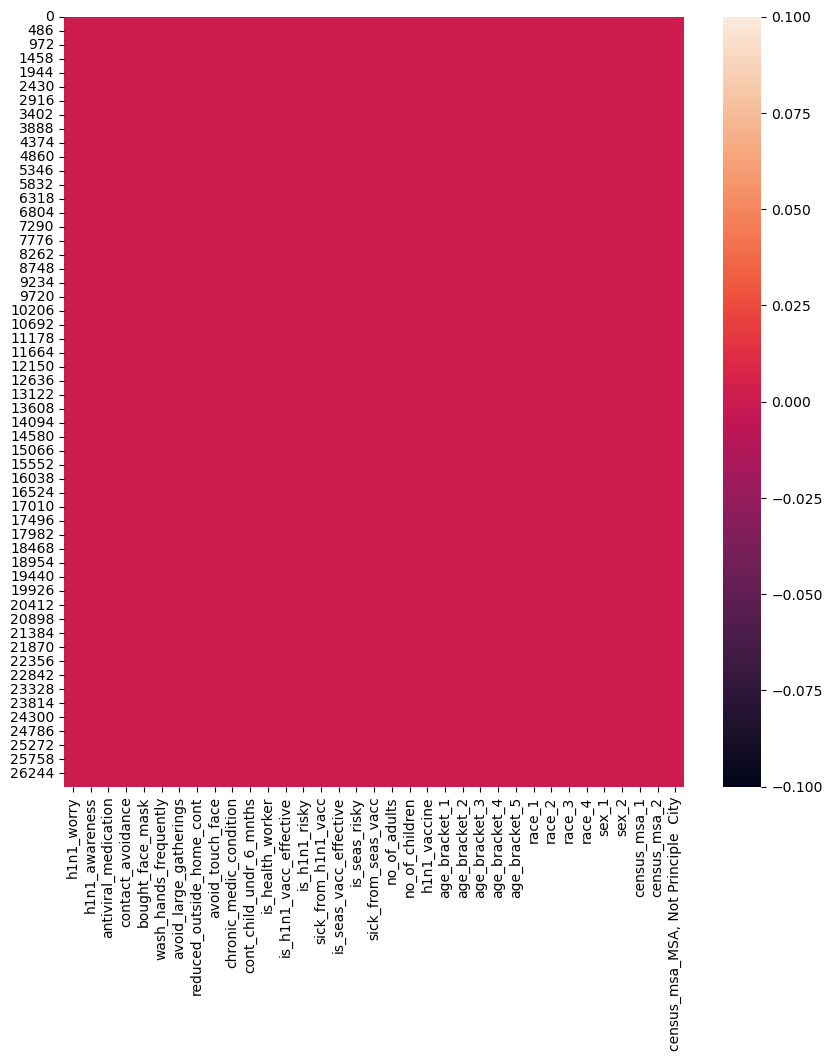

In [36]:
#Again  visulaizing the data

plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())
plt.show()

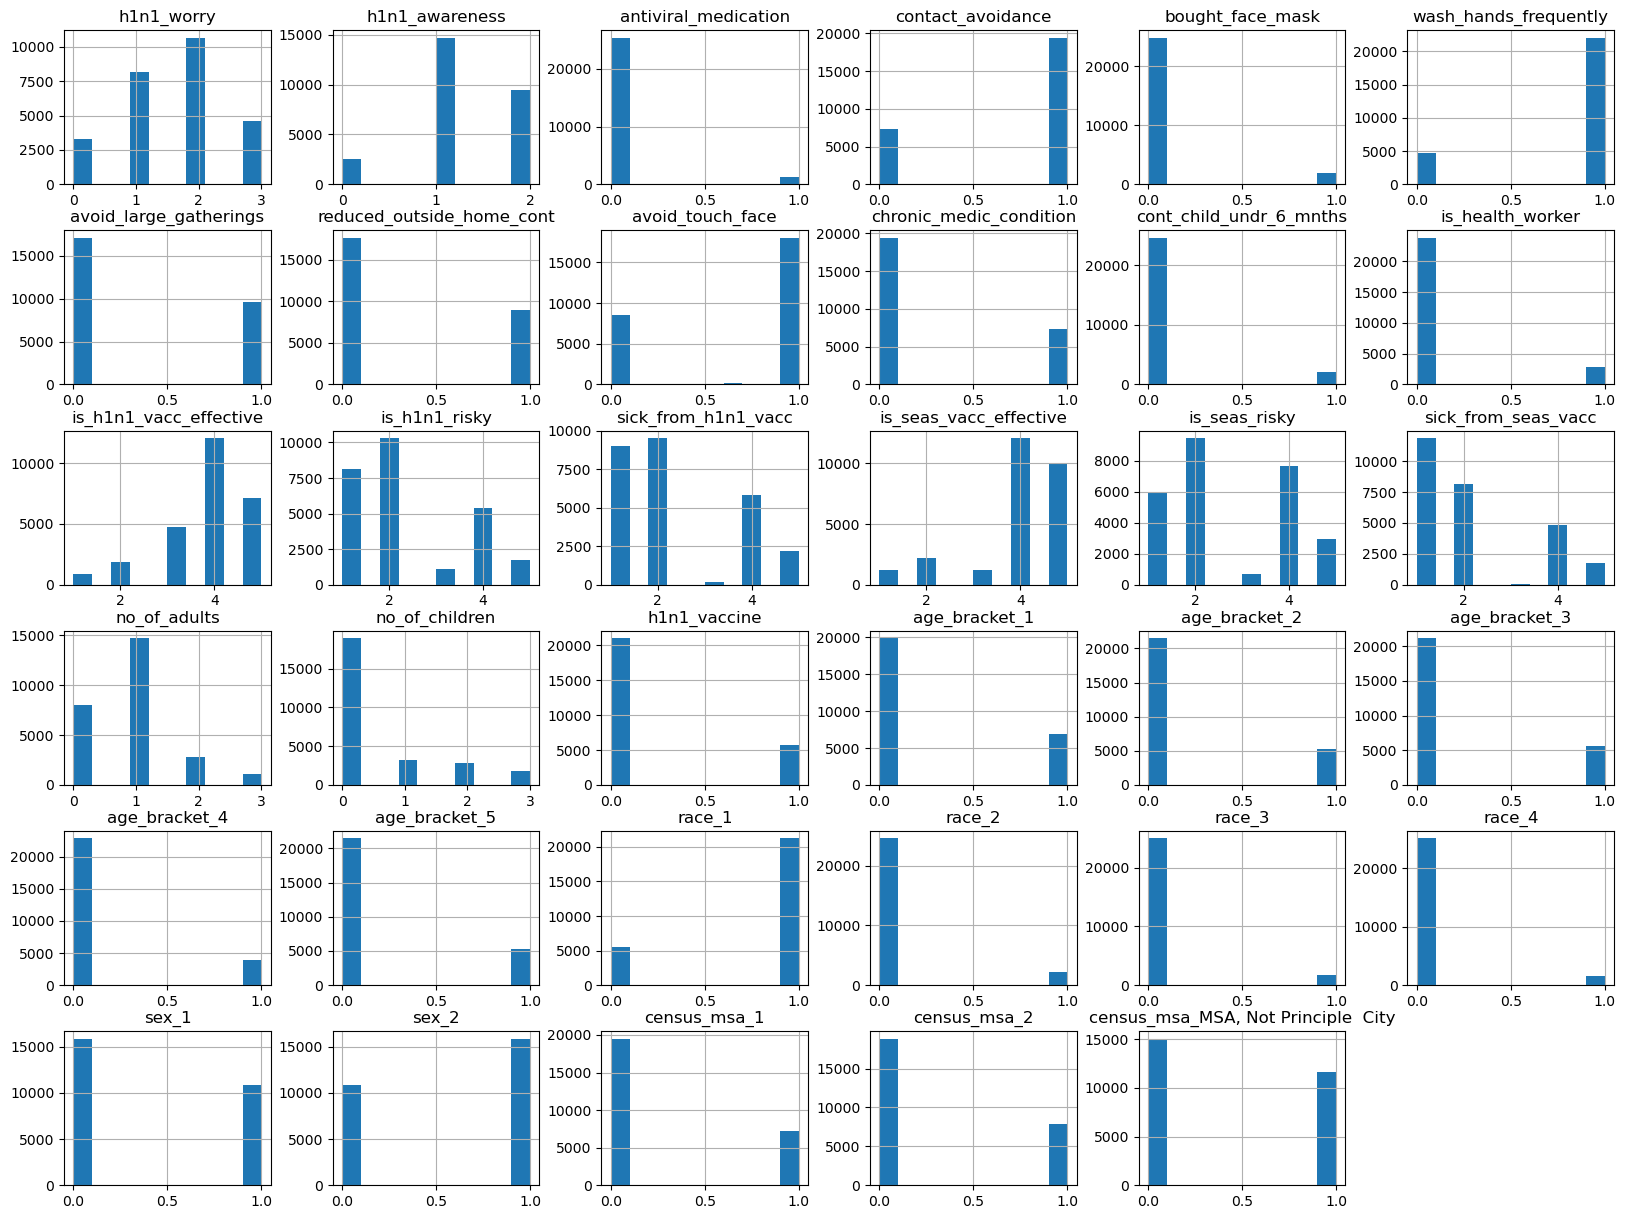

In [37]:
data.hist(figsize=(20,15))
plt.show()

In [38]:
correlation_mat=data.corr()

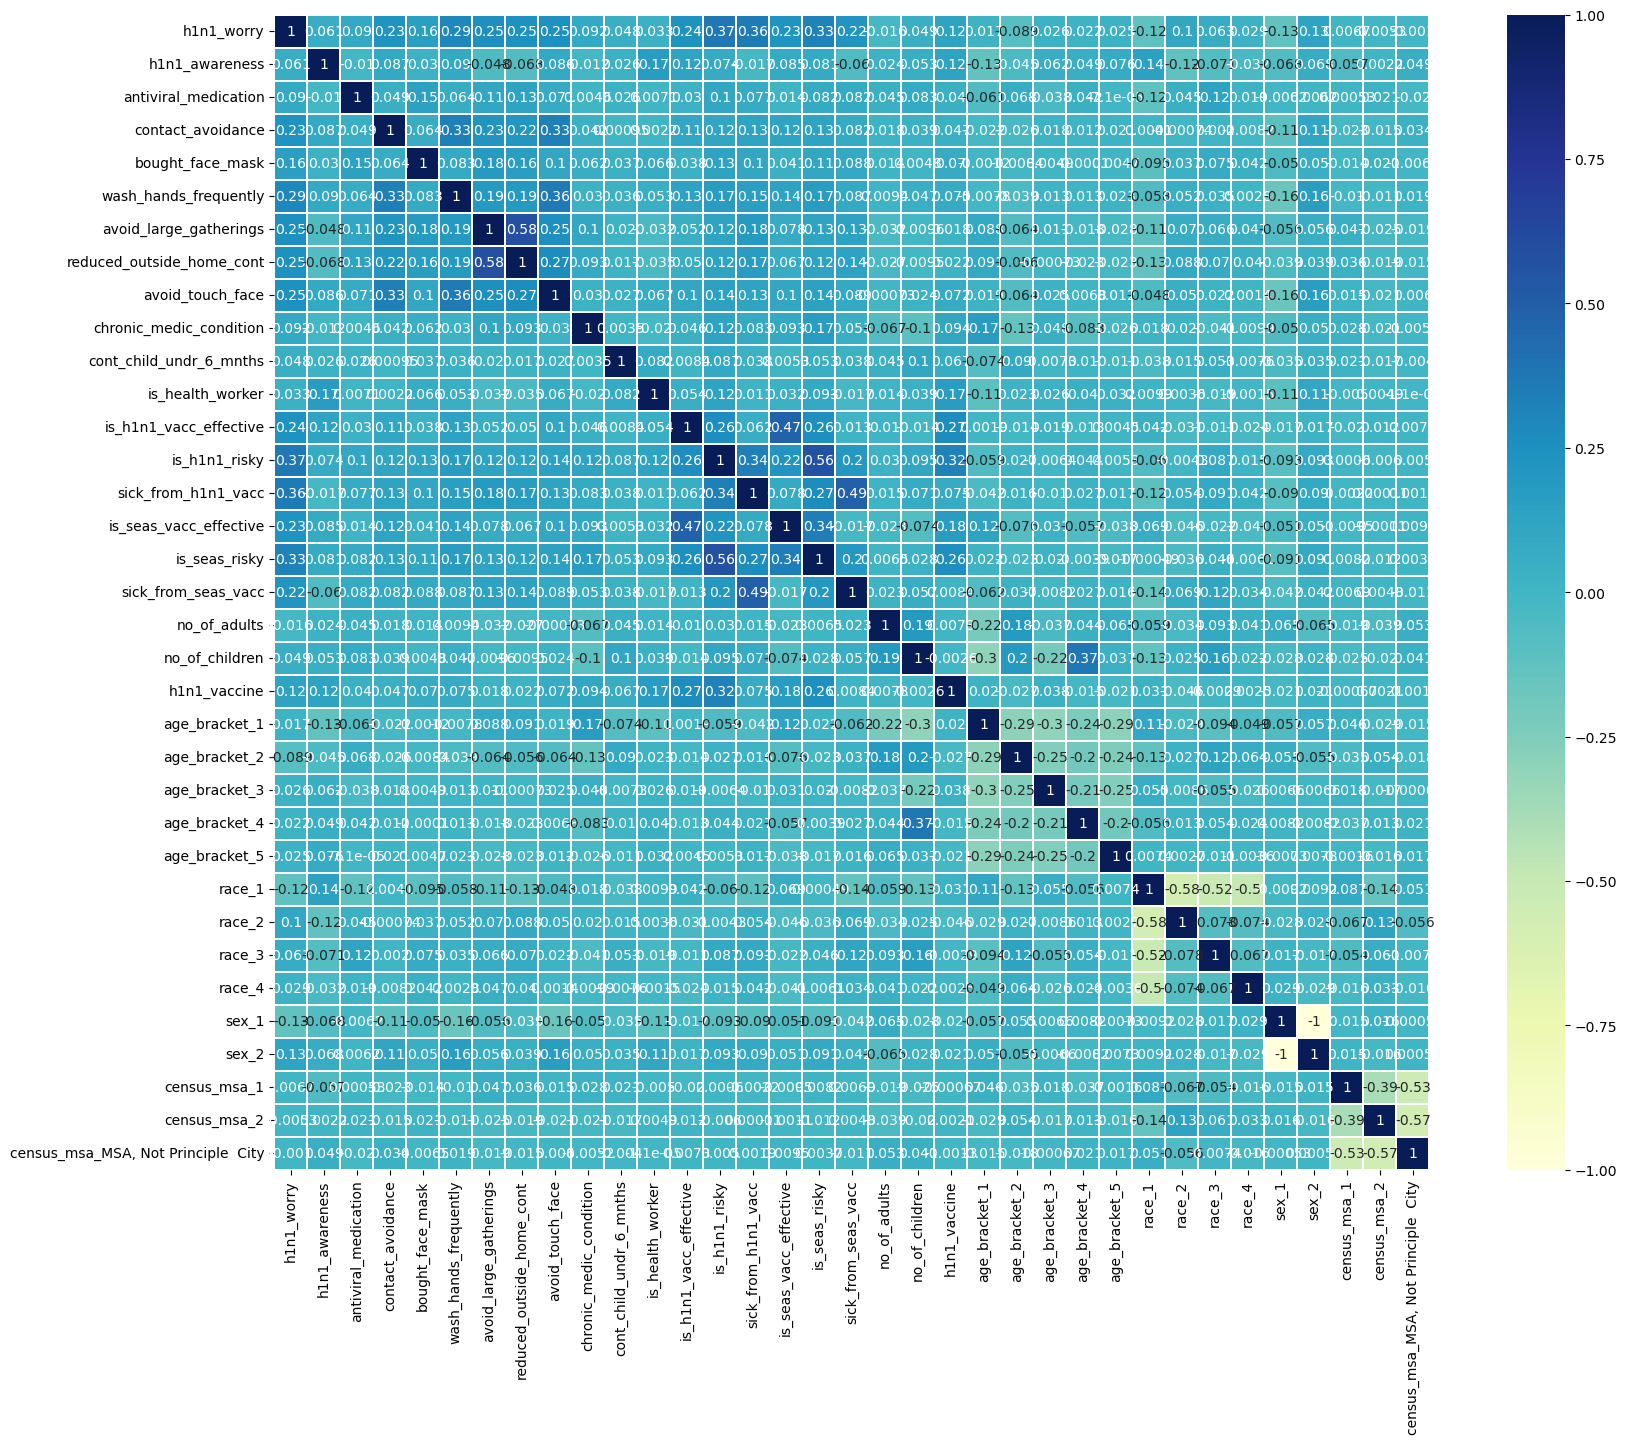

In [39]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation_mat,annot=True,linewidth=0.3,cmap="YlGnBu",square=True)
plt.show()

In [40]:
### Step 4:x,y-->train data test data->Fit the model with training data  predict with the test data

In [41]:
# All the independent varibles
x=data.drop(["h1n1_vaccine"],axis=1)

#Dependent varible
y=data["h1n1_vaccine"]

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=1)

## Logistic Regression

In [43]:
lrc = LogisticRegression()
lrc.fit(X_train,Y_train)

LogisticRegression()

In [44]:
print(lrc.score(X_train,Y_train))
print(lrc.score(X_test,Y_test))

0.813714018254154
0.8167353051291651


Test score of Logistic Regression 0.8167353051291651


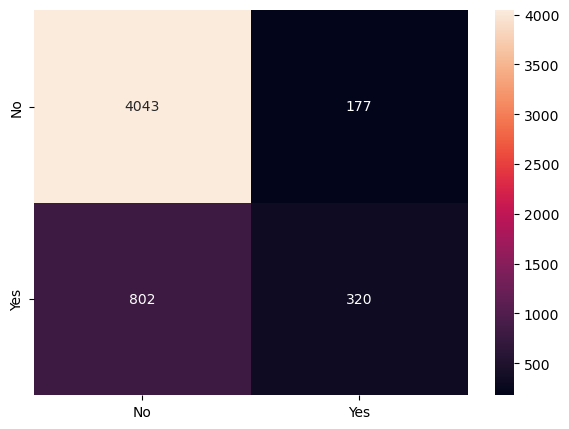

In [45]:
y_predict1 = lrc.predict(X_test)
print(f"Test score of Logistic Regression {lrc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict1,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

## Decision Tree

In [46]:
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
print(d_tree.score(X_train,Y_train))
print(d_tree.score(X_test,Y_test))

0.9992979171542242
0.7302508423811307


In [48]:
d_treeR=DecisionTreeClassifier(max_depth=9)
d_treeR.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9)

In [49]:
print(d_treeR.score(X_train,Y_train))
print(d_treeR.score(X_test,Y_test))

0.8344956704891178
0.8099962560838637


Test score of Decision tree 0.8099962560838637


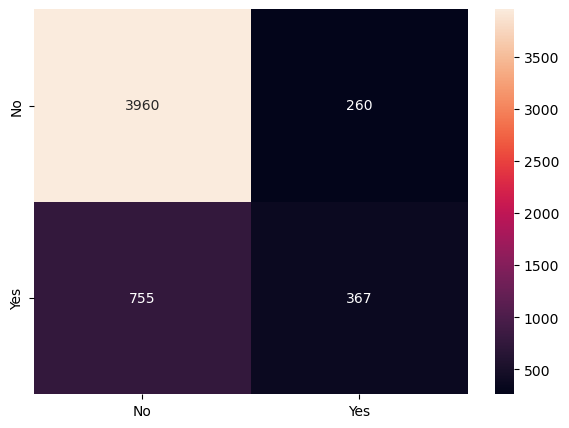

In [50]:
y_predict2 = d_treeR.predict(X_test)
print(f"Test score of Decision tree {d_treeR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict2,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

## GradientBoostingClassifier

In [51]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [52]:
print(gbc.score(X_train,Y_train))
print(gbc.score(X_test,Y_test))

0.8209688743271706
0.8178584799700487


Test score of Gradient Boosting Classifier 0.8178584799700487


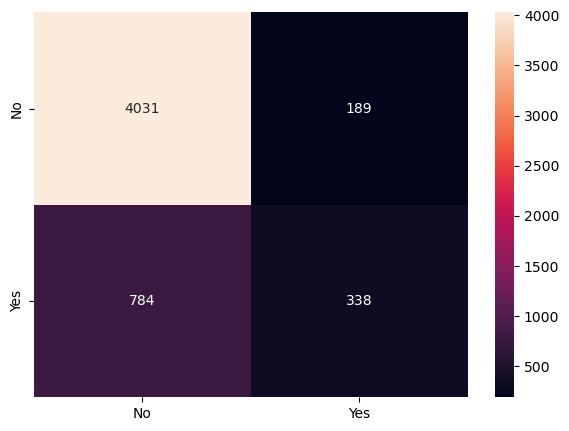

In [53]:
y_predict3 = gbc.predict(X_test)
print(f"Test score of Gradient Boosting Classifier {gbc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict3,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

## AdaBoostClassifier

In [54]:
adc=AdaBoostClassifier()
adc.fit(X_train,Y_train)

AdaBoostClassifier()

In [55]:
print(adc.score(X_train,Y_train))
print(adc.score(X_test,Y_test))

0.8143692955768781
0.814301759640584


Test score of AdaBoost Classifier 0.814301759640584


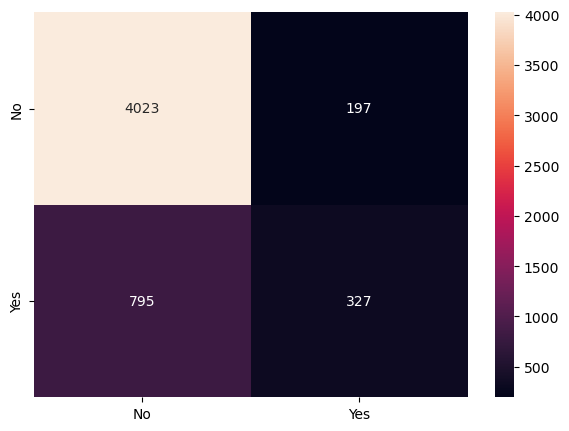

In [56]:
y_predict4 = adc.predict(X_test)
print(f"Test score of AdaBoost Classifier {adc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict4,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

## RandomForestClassifier

In [57]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)


RandomForestClassifier()

In [58]:
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))

0.9992043061081207
0.8165481093223512


In [59]:
rfcR=RandomForestClassifier(max_depth=10)
rfcR.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10)

In [60]:
print(rfcR.score(X_train,Y_train))
print(rfcR.score(X_test,Y_test))

0.8407676105780482
0.8161737177087234


Test score of Random Forest Classifier 0.8161737177087234


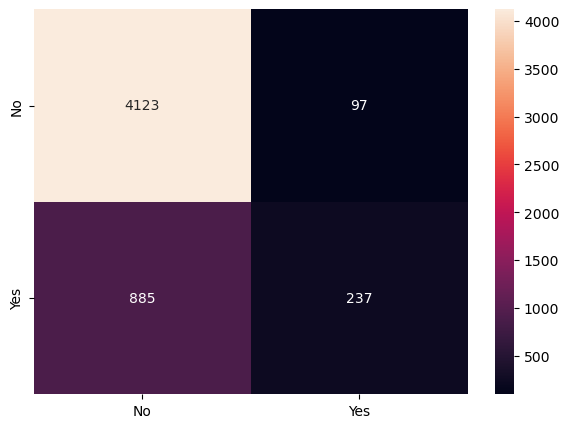

In [61]:
y_predict5 = rfcR.predict(X_test)
print(f"Test score of Random Forest Classifier {rfcR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict5,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

## BaggingClassifier

In [62]:
bc=BaggingClassifier()
bc.fit(X_train,Y_train)

BaggingClassifier()

In [63]:
print(bc.score(X_train,Y_train))
print(bc.score(X_test,Y_test))

0.9813714018254154
0.7978285286409584


In [64]:
bcR=BaggingClassifier(base_estimator=d_treeR)
bcR.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [65]:
print(bcR.score(X_train,Y_train))
print(bcR.score(X_test,Y_test))

0.8445588579452376
0.8187944590041183


Test score of Bagging Classifier 0.8187944590041183


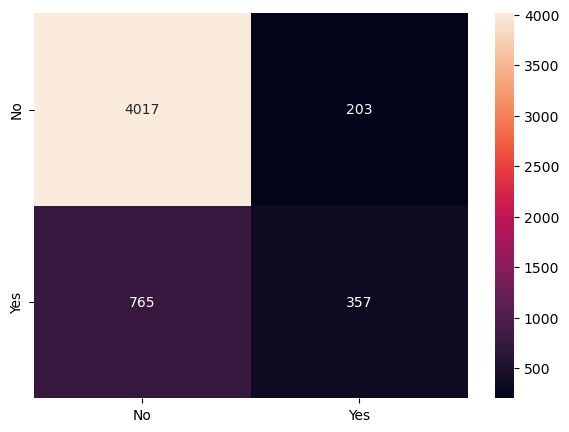

In [66]:
y_predict6 = bcR.predict(X_test)
print(f"Test score of Bagging Classifier {bcR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict6,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [67]:
#now we try to find the accuracy and precision of all algorithms

In [68]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    acc= accuracy_score(Y_test,Y_pred)

    precision= precision_score(Y_test,Y_pred)
    return acc,precision

In [69]:
accuracy_scores=[]
precision_scores=[]


In [70]:
clfs = {
    'DecisionTree' : d_treeR,
    'LogisticRegression' : lrc,
    'RandomForestClassifier' : rfcR,
    'AdaBoostingClassifier' : adc,
    'BaggingClassifier': bcR,
    'GradientBoostingClassifier':gbc}

In [71]:
for name,clf in clfs.items():
      
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,Y_train,Y_test)
        
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ',current_precision)
    print("\n\n")
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DecisionTree
Accuracy -  0.8103706476974916
Precision -  0.5880452342487884



For  LogisticRegression
Accuracy -  0.8167353051291651
Precision -  0.6438631790744467



For  RandomForestClassifier
Accuracy -  0.8172968925496069
Precision -  0.6910994764397905



For  AdaBoostingClassifier
Accuracy -  0.814301759640584
Precision -  0.6240458015267175



For  BaggingClassifier
Accuracy -  0.8184200673904904
Precision -  0.6417910447761194



For  GradientBoostingClassifier
Accuracy -  0.8178584799700487
Precision -  0.6413662239089184





In [72]:
val={'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}
performance_df =pd.DataFrame(val).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,RandomForestClassifier,0.817297,0.691099
1,LogisticRegression,0.816735,0.643863
4,BaggingClassifier,0.818420,0.641791
5,GradientBoostingClassifier,0.817858,0.641366
3,AdaBoostingClassifier,0.814302,0.624046
0,DecisionTree,0.810371,0.588045


In [73]:
## hence RanRandomForestClassifier gives the higher accuracy and precision than other Algorithms